#  EMF RBM Energy Landscapes

Comparison of Entropy and Energetics Contributions to RBM Free Energy


- use the TAP S and MF Energy *U_naive   
    - which takes an equlibration step first  
    - S(mv, mh), U_naive(mv, mh)
    
- use a simple h = means_hiddens() step
    - S(v, h), E_MF(v, h)


In [1]:
import numpy as np
import h5py

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import linear_model, datasets, metrics, preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

import psutil

### Helper methods for simple case

In [2]:
from sklearn.utils.fixes import expit    
from sklearn.utils.extmath import safe_sparse_dot

def sig_means(x, b, W):
    a = safe_sparse_dot(x, W.T) + b
    return expit(a, out=a)

In [3]:
import emf_rbm

In [4]:
import rbm_datasets

### binarized Omniglot

In [5]:
train_x, train_t, train_char, test_x, test_t, test_char = rbm_datasets.load_omniglot_iwae()
print train_x.shape, train_t.shape
print "there are ",np.unique(train_char).shape, " classes"

(24345, 784) (24345,)
there are  (55,)  classes


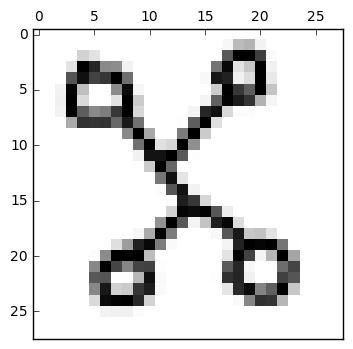

In [6]:
image = train_x[0,:]
image = np.reshape(image,[28,28])
rbm_datasets.show_image(image)

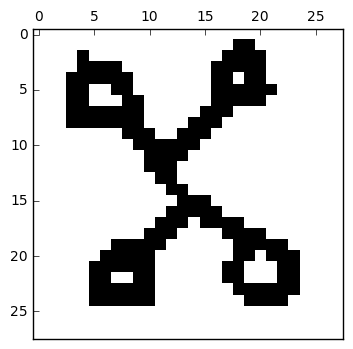

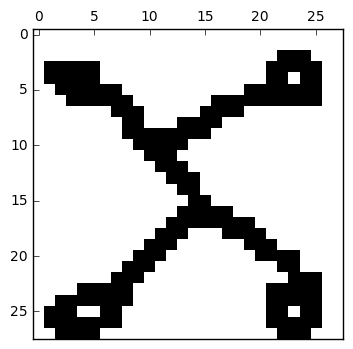

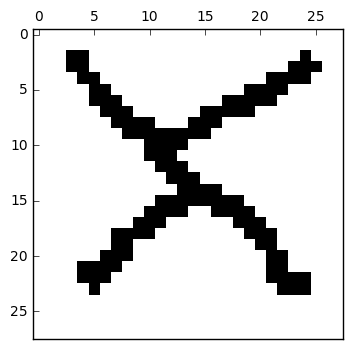

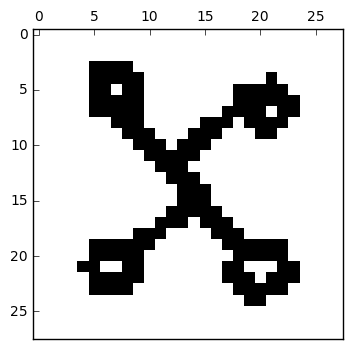

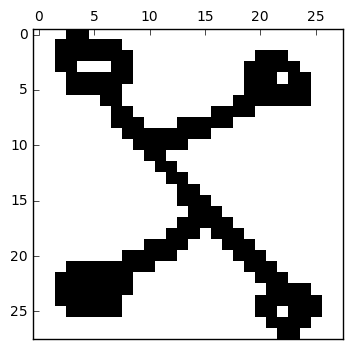

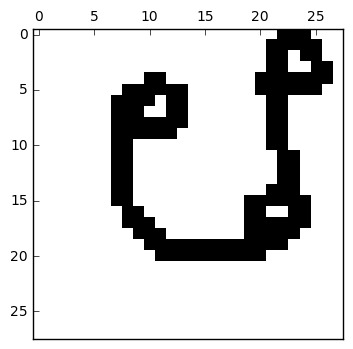

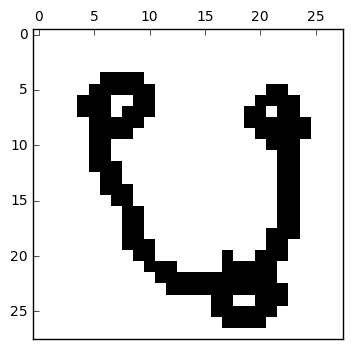

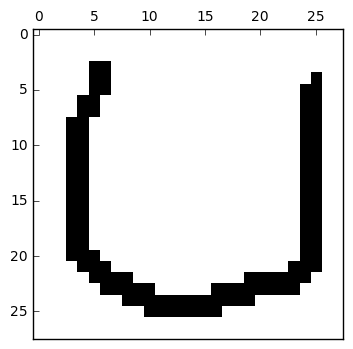

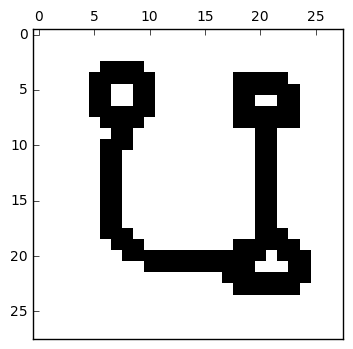

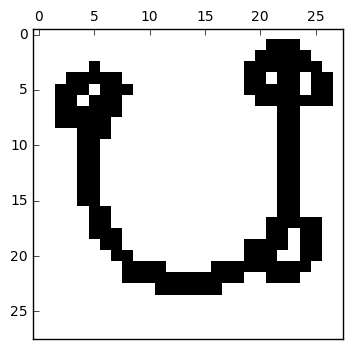

In [7]:
from sklearn.preprocessing import binarize
BX_train = binarize(train_x, threshold=0.2)
for i in range(10):
    image = BX_train[i,:]
    image = np.reshape(image,[28,28])
    rbm_datasets.show_image(image)

In [8]:
X = BX_train

In [10]:
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True)
rbm.fit(X)

[EMF_RBM] Iteration 1, pseudo-likelihood = -218.02, time = 9.92s
computing TAP Free Energies
monitor:  -276.154657235 385.088035161 108.938441768
[EMF_RBM] Iteration 2, pseudo-likelihood = -216.72, time = 23.56s
computing TAP Free Energies
monitor:  -275.810058661 385.023875305 109.220864897
[EMF_RBM] Iteration 3, pseudo-likelihood = -215.94, time = 23.33s
computing TAP Free Energies
monitor:  -275.032062217 384.506713751 109.505866084
[EMF_RBM] Iteration 4, pseudo-likelihood = -205.75, time = 23.48s
computing TAP Free Energies
monitor:  -271.053074579 379.814871573 109.022561805
[EMF_RBM] Iteration 5, pseudo-likelihood = -197.56, time = 23.63s
computing TAP Free Energies
monitor:  -263.175889527 362.183296867 99.8477143099
[EMF_RBM] Iteration 6, pseudo-likelihood = -188.68, time = 23.55s
computing TAP Free Energies
monitor:  -255.034883955 345.042511063 91.2832555544
[EMF_RBM] Iteration 7, pseudo-likelihood = -180.60, time = 23.57s
computing TAP Free Energies
monitor:  -249.046343826 

EMF_RBM(batch_size=100, decay=0.01, learning_rate=0.005, momentum=0.5,
    monitor=True, n_components=256, n_iter=20, neq_steps=3,
    random_state=<mtrand.RandomState object at 0x7f01641159b0>,
    sigma=0.001, thresh=1e-08, verbose=True, weight_decay='L1')

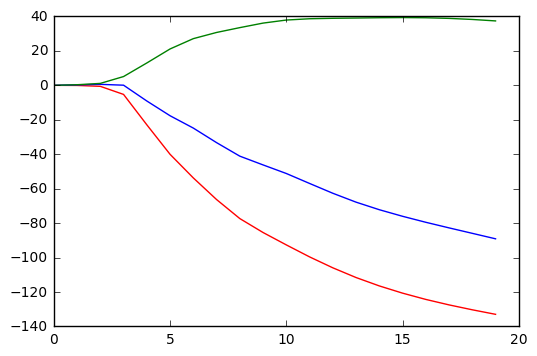

In [12]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green')

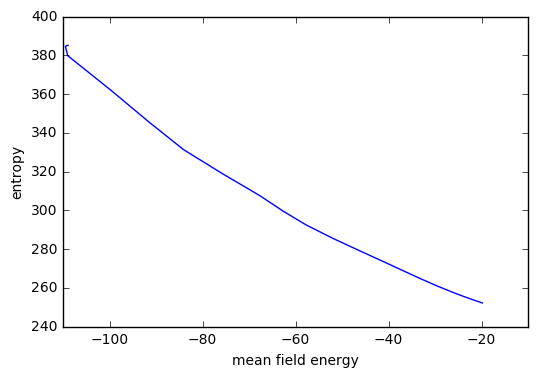

In [37]:
plt.plot(-1*np.array(rbm.mean_field_energies), rbm.entropies)
plt.ylabel("entropy")
plt.xlabel("mean field energy")

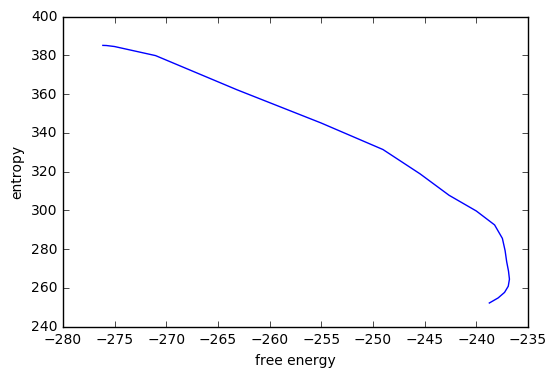

In [33]:
plt.plot(np.array(rbm.free_energies), rbm.entropies)
plt.xlabel("free energy")
plt.ylabel("entropy")

### Mnist

In [38]:
x_train, x_valid, x_test = rbm_datasets.load_mnist_binarized()

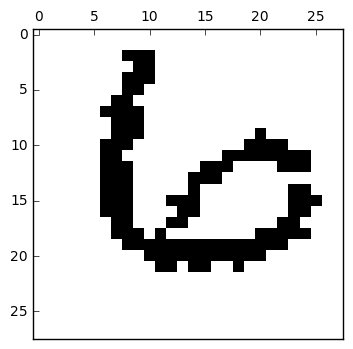

In [39]:
v = x_train[0,:]
rbm_datasets.show_image(np.reshape(v,[28,28]))

In [47]:
X = x_train
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True)
rbm.fit(X)

[EMF_RBM] Iteration 1, pseudo-likelihood = -199.59, time = 20.72s
computing TAP Free Energies
monitor:  -295.530125579 373.035873411 77.703224412
[EMF_RBM] Iteration 2, pseudo-likelihood = -167.05, time = 49.33s
computing TAP Free Energies
monitor:  -275.473667127 312.996972617 38.991702377
[EMF_RBM] Iteration 3, pseudo-likelihood = -152.92, time = 48.22s
computing TAP Free Energies
monitor:  -264.793610297 275.32695053 12.8482423977
[EMF_RBM] Iteration 4, pseudo-likelihood = -142.16, time = 48.15s
computing TAP Free Energies
monitor:  -260.531919623 254.907852005 -2.74993197686
[EMF_RBM] Iteration 5, pseudo-likelihood = -133.59, time = 48.34s
computing TAP Free Energies
monitor:  -259.512453311 241.399193965 -14.656403234
[EMF_RBM] Iteration 6, pseudo-likelihood = -127.57, time = 48.27s
computing TAP Free Energies
monitor:  -259.774258382 231.219323142 -24.5728610533
[EMF_RBM] Iteration 7, pseudo-likelihood = -125.34, time = 48.66s
computing TAP Free Energies
monitor:  -260.789335834 

EMF_RBM(batch_size=100, decay=0.01, learning_rate=0.005, momentum=0.5,
    monitor=True, n_components=256, n_iter=20, neq_steps=3,
    random_state=<mtrand.RandomState object at 0x7f01641159b0>,
    sigma=0.001, thresh=1e-08, verbose=True, weight_decay='L1')

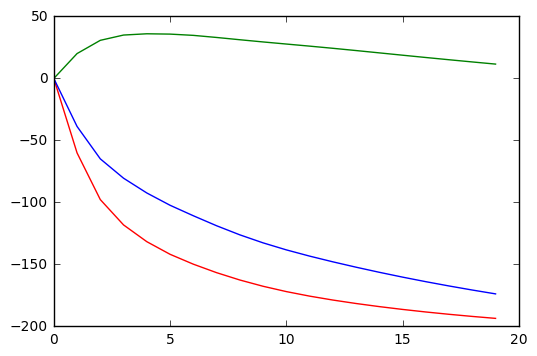

In [53]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green')

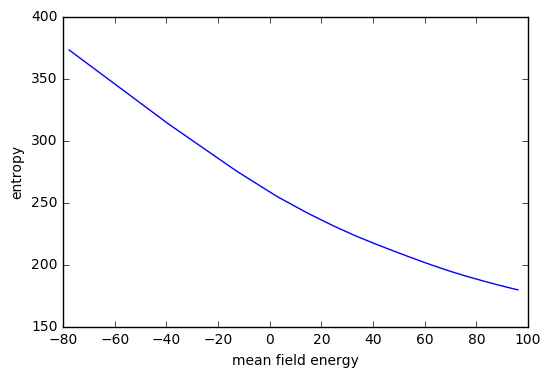

In [54]:
plt.plot(-1*np.array(rbm.mean_field_energies), rbm.entropies)
plt.ylabel("entropy")
plt.xlabel("mean field energy")

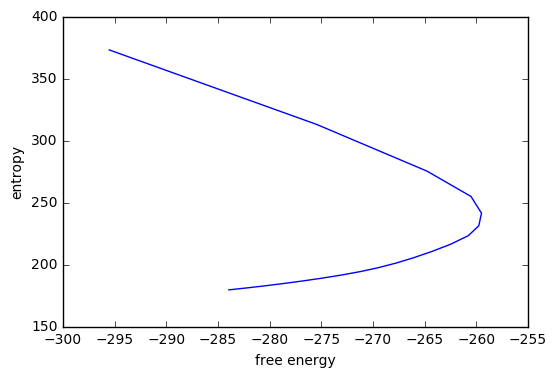

In [55]:
plt.plot(np.array(rbm.free_energies), rbm.entropies)
plt.xlabel("free energy")
plt.ylabel("entropy")

WTF ?!

### Random Data

In [13]:
noise = np.random.normal(size=X.shape)

In [14]:
N = X+noise;

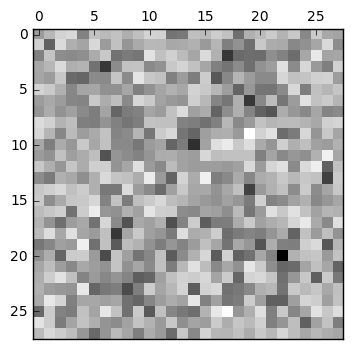

In [16]:
v = N[0,:]
rbm_datasets.show_image(np.reshape(v,[28,28]))

###  not really binarized but it should be

In [21]:
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True)
rbm= rbm.fit(N)

[EMF_RBM] Iteration 1, pseudo-likelihood = -1643.18, time = 9.54s
computing TAP Free Energies
monitor:  -152.444200443 414.609709171 262.185777638
[EMF_RBM] Iteration 2, pseudo-likelihood = -1717.07, time = 22.76s
computing TAP Free Energies
monitor:  -145.57228175 413.865910268 268.401601757
[EMF_RBM] Iteration 3, pseudo-likelihood = -1725.51, time = 23.00s
computing TAP Free Energies
monitor:  -130.578616917 404.508344729 274.795938752
[EMF_RBM] Iteration 4, pseudo-likelihood = -1922.03, time = 22.95s
computing TAP Free Energies
monitor:  -110.325891454 377.9256588 270.154306443
[EMF_RBM] Iteration 5, pseudo-likelihood = -2079.38, time = 23.00s
computing TAP Free Energies
monitor:  -91.4252709776 355.628547258 268.85885629
[EMF_RBM] Iteration 6, pseudo-likelihood = -2237.11, time = 22.86s
computing TAP Free Energies
monitor:  -71.8145698935 340.953002613 276.298854379
[EMF_RBM] Iteration 7, pseudo-likelihood = -2568.36, time = 22.99s
computing TAP Free Energies
monitor:  -49.92115762

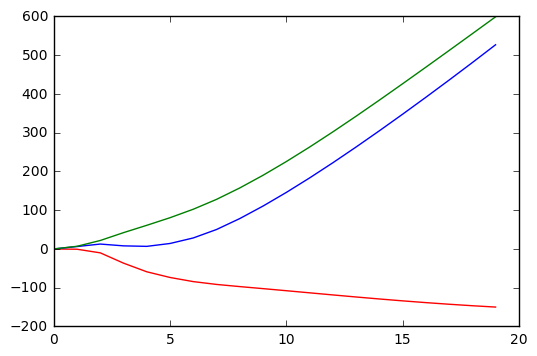

In [23]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green')